In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
x = iris.data
x = StandardScaler().fit_transform(x)
y = iris.target

In [2]:
max_clusters = 15
min_clusters = len(np.unique(y))
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters-min_clusters+1)))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

In [3]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score

for c in k:
    kmedias = KMeans(n_clusters=int(c), random_state=0)
    kmedias.fit(x)
    moda = -1 * np.ones(int(c))
    for i in range(int(c)):
        moda[i] = mode(y[kmedias.labels_==i])[0]
    y_predict = moda[kmedias.predict(x)]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
tabla

Clusters         3         4         5         6     7         8         9  \
CV                                                                           
0         0.833333  0.826667  0.833333  0.826667  0.94  0.913333  0.933333   

Clusters    10        11    12        13        14        15  
CV                                                            
0         0.94  0.953333  0.92  0.953333  0.966667  0.946667

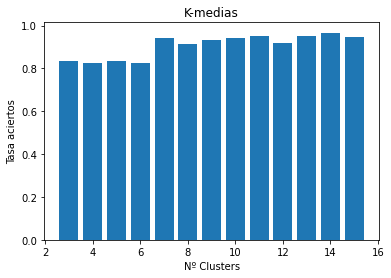

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.9666666666666667


In [4]:
import matplotlib.pyplot as plt

plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("K-medias")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

In [5]:
from scipy.cluster.hierarchy import linkage, cut_tree

agl_min = linkage(x, method="single") #min
for c in k:
    clusters = cut_tree(agl_min, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c))        
    for i in range(int(c)):
        moda[i] = mode(y[clusters == i])[0]
    y_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
    
tabla

Clusters         3         4         5         6         7         8    9  \
CV                                                                          
0         0.666667  0.686667  0.686667  0.693333  0.693333  0.693333  0.7   

Clusters   10        11        12        13        14        15  
CV                                                               
0         0.7  0.706667  0.706667  0.706667  0.713333  0.713333

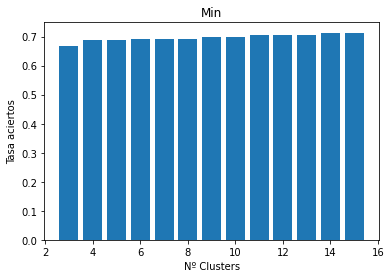

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.7133333333333334


In [6]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("Min")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

In [7]:
agl_max = linkage(x, method="complete") #max
for c in k:
    clusters = cut_tree(agl_max, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c))        
    for i in range(int(c)):
        moda[i] = mode(y[clusters == i])[0]
    y_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
    
tabla

Clusters         3         4         5         6         7     8     9    10  \
CV                                                                             
0         0.786667  0.786667  0.786667  0.786667  0.786667  0.88  0.94  0.94   

Clusters    11    12        13        14        15  
CV                                                  
0         0.94  0.94  0.946667  0.946667  0.946667

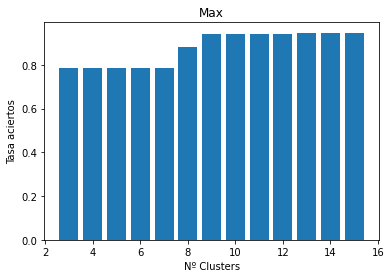

El valor de K más óptimo es: 13 que da una tasa de acierto de: 0.9466666666666667


In [8]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("Max")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

In [9]:
agl_media = linkage(x, method="average") #media
for c in k:
    clusters = cut_tree(agl_media, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c))        
    for i in range(int(c)):
        moda[i] = mode(y[clusters == i])[0]
    y_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
    
tabla

Clusters         3         4     5     6     7     8     9    10    11    12  \
CV                                                                             
0         0.686667  0.686667  0.78  0.78  0.88  0.88  0.88  0.88  0.94  0.94   

Clusters    13    14    15  
CV                          
0         0.94  0.94  0.94

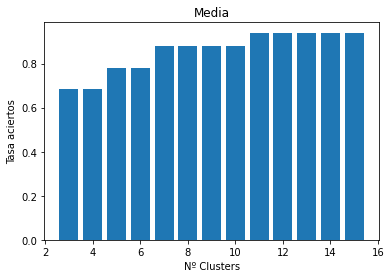

El valor de K más óptimo es: 11 que da una tasa de acierto de: 0.94


In [10]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("Media")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

In [11]:
agl_ward = linkage(x, method="ward") #ward
for c in k:
    clusters = cut_tree(agl_ward, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c))        
    for i in range(int(c)):
        moda[i] = mode(y[clusters == i])[0]
    y_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
    
tabla

Clusters         3         4         5         6         7         8  \
CV                                                                     
0         0.826667  0.833333  0.833333  0.833333  0.833333  0.833333   

Clusters         9        10        11        12        13        14        15  
CV                                                                              
0         0.833333  0.893333  0.893333  0.926667  0.926667  0.933333  0.933333

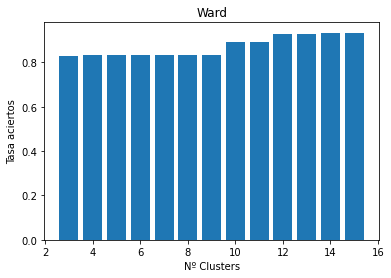

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.9333333333333333


In [12]:
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean())
plt.title("Ward")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

In [13]:
agl_prueba = linkage(x, method="single")
for c in k:
    clusters = cut_tree(agl_prueba, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c))
    for i in range(int(c)):
        moda[i] = mode(y[clusters==i])[0]
    y_predict = moda[clusters]
    tabla.loc[0,c] = accuracy_score(y, y_predict)
tabla

Clusters         3         4         5         6         7         8    9  \
CV                                                                          
0         0.666667  0.686667  0.686667  0.693333  0.693333  0.693333  0.7   

Clusters   10        11        12        13        14        15  
CV                                                               
0         0.7  0.706667  0.706667  0.706667  0.713333  0.713333

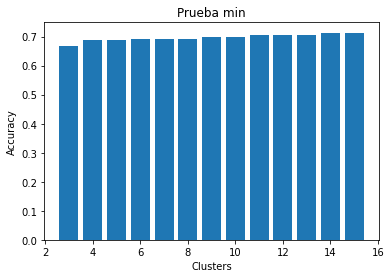

El valor de K más óptimo es: 14 que da una tasa de acierto de: 0.7133333333333334


In [14]:
plt.bar(np.arange(min_clusters, max_clusters+1, dtype=int), tabla.mean())
plt.title("Prueba min")
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.show()
print("El valor de K más óptimo es:", tabla.columns[tabla.mean().argmax()], "que da una tasa de acierto de:", tabla.mean().max())